In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
i = 4
dataset = {1: { 'type': 'crosslink_data',
                'name':'AChernev_080219_HeLa_RNA_UV',
                'comparison':'opti_'},
           2: { 'type': 'crosslink_data',
                'name':'M_Raabe_A_Wulf_220421_270421_Expl3_Ecoli_XL_UV_S30_LB_bRPfrac_11',
                'comparison':'perc'},
           3: { 'type': 'crosslink_data',
                'name':'M_Raabe_A_Wulf_220421_290421_Expl3_Ecoli_XL_DEB_S30_LB_bRPfrac_12',
                'comparison':'perc'},
           4: { 'type': 'crosslink_data',
                'name':'MRaabe_LW_091221_171221_Expl2_XL_Ecoli_NM_S30_bRP_rep1_11',
                'comparison':'perc'}}

In [81]:
input_file_original = f"../data/{dataset[i]['type']}/{dataset[i]['name']}_filtered.pkl"
input_file_svm = f"../data/{dataset[i]['type']}/{dataset[i]['name']}_SVM_filtered.pkl"
input_file_perc = f"../data/{dataset[i]['type']}/{dataset[i]['name']}_{dataset[i]['comparison']}_filtered.pkl"


In [82]:
# read original dataframes
df_original = pd.read_pickle(input_file_original)
df_svm = pd.read_pickle(input_file_svm)
df_perc = pd.read_pickle(input_file_perc)

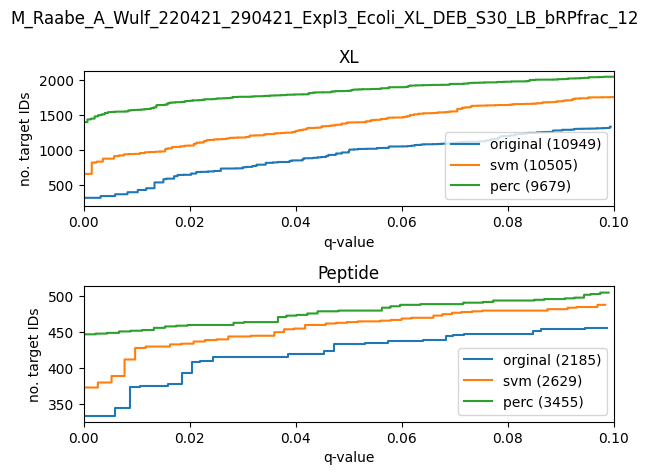

In [ ]:
fig, axs = plt.subplots(2)
axs[0].step(df_original.loc[(df_original['NuXL:isXL']== 1) & (df_original['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_original.loc[(df_original['NuXL:isXL']== 1) & (df_original['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"original ({len(df_original[df_original['NuXL:isXL']== 1])})")
axs[1].step(df_original.loc[(df_original['NuXL:isXL']== 0) & (df_original['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_original.loc[(df_original['NuXL:isXL']== 0) & (df_original['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"orginal ({len(df_original[df_original['NuXL:isXL']== 0])})")
axs[0].step(df_svm.loc[(df_svm['NuXL:isXL']== 1) & (df_svm['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_svm.loc[(df_svm['NuXL:isXL']== 1) & (df_svm['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"svm ({len(df_svm[df_svm['NuXL:isXL']== 1])})")
axs[1].step(df_svm.loc[(df_svm['NuXL:isXL']== 0) & (df_svm['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_svm.loc[(df_svm['NuXL:isXL']== 0) & (df_svm['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"svm ({len(df_svm[df_svm['NuXL:isXL']== 0])})")
axs[0].step(df_perc.loc[(df_perc['NuXL:isXL']== 1) & (df_perc['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_perc.loc[(df_perc['NuXL:isXL']== 1) & (df_perc['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc['NuXL:isXL']== 1])})")
axs[1].step(df_perc.loc[(df_perc['NuXL:isXL']== 0) & (df_perc['class-specific_q-val']<= 0.1), 'class-specific_q-val'],df_perc.loc[(df_perc['NuXL:isXL']== 0) & (df_perc['class-specific_q-val']<= 0.1), 'cum_target_id'], label=f"{dataset[i]['comparison']} ({len(df_perc[df_perc['NuXL:isXL']== 0])})")
axs[0].set_xlim(0,0.1)
axs[1].set_xlim(0,0.1)
axs[0].set_title("XL")
axs[1].set_title("Peptide")
axs[0].set_xlabel("q-value")
axs[1].set_xlabel("q-value")
axs[0].set_ylabel("no. target IDs")
axs[1].set_ylabel("no. target IDs")
axs[0].legend()
axs[1].legend()
fig.suptitle(dataset[i]['name'])
fig.tight_layout()
plt.savefig(f"../results/{dataset[i]['type']}/{dataset[i]['name']}.png")
plt.show()

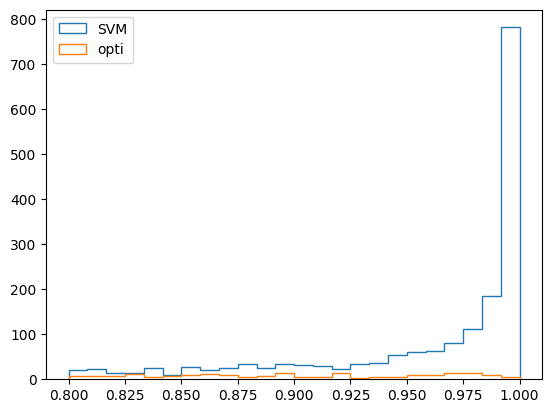

In [84]:
bins = np.linspace(0.8,1,25)
plt.hist(df_svm.loc[df_svm[df_svm['Score'] > 0.8].index, 'Score'], label = 'SVM', histtype='step', bins=bins)
plt.hist(df_perc.loc[df_perc[df_perc['Score'] > 0.8].index, 'Score'], label='opti', histtype='step', bins = bins)
plt.legend()
plt.show()